In [304]:
import pandas as pd
from scipy.signal import correlate, correlation_lags
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [305]:
data = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/isat_690/project/Sleep_health_and_lifestyle_dataset.csv')

In [306]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [307]:
# Split the Blood Pressure column into two separate columns
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original Blood Pressure column
data = data.drop('Blood Pressure', axis=1)

# One-hot encode the categorical variables
categorical_vars = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoder = OneHotEncoder(sparse=False)
encoded_vars = pd.DataFrame(encoder.fit_transform(data[categorical_vars]))

# Generate column names for the one-hot encoded variables
encoded_vars.columns = ['{}_{}'.format(var, category) for var, categories in zip(categorical_vars, encoder.categories_) for category in categories]

data = pd.concat([data, encoded_vars], axis=1).drop(categorical_vars, axis=1)

# Split the data into training and test sets
X = data.drop(['Heart Rate', 'Systolic BP', 'Diastolic BP'], axis=1)
y_hr = data['Heart Rate']
y_sbp = data['Systolic BP']
y_dbp = data['Diastolic BP']
X_train, X_test, y_hr_train, y_hr_test, y_sbp_train, y_sbp_test, y_dbp_train, y_dbp_test = train_test_split(X, y_hr, y_sbp, y_dbp, test_size=0.2, random_state=0)

# Create a LinearRegression model for predicting Heart Rate and fit it to the training data
hr_model = LinearRegression().fit(X_train, y_hr_train)

# Create a LinearRegression model for predicting Systolic BP and fit it to the training data
sbp_model = LinearRegression().fit(X_train, y_sbp_train)

# Create a LinearRegression model for predicting Diastolic BP and fit it to the training data
dbp_model = LinearRegression().fit(X_train, y_dbp_train)

# Make predictions on the test data
hr_predictions = hr_model.predict(X_test)
sbp_predictions = sbp_model.predict(X_test)
dbp_predictions = dbp_model.predict(X_test)



/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


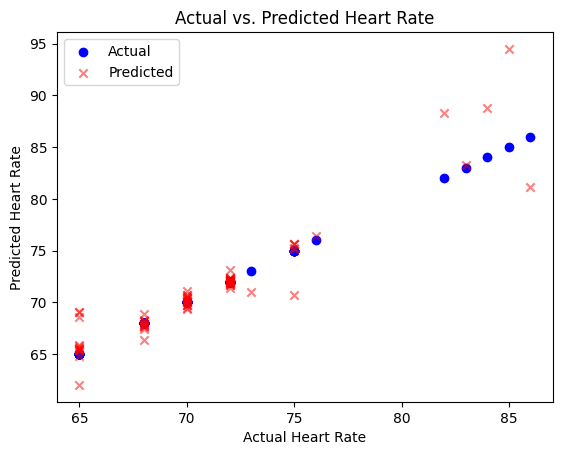

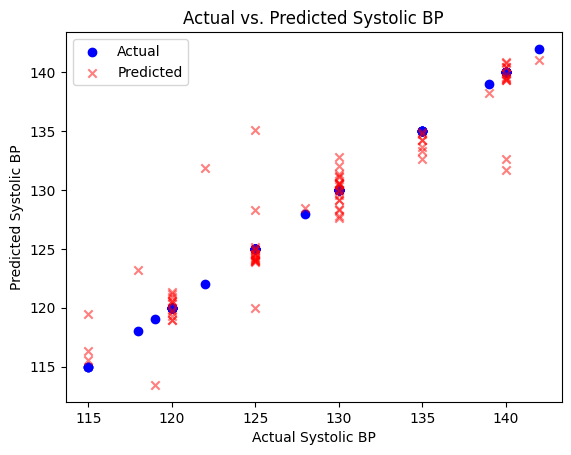

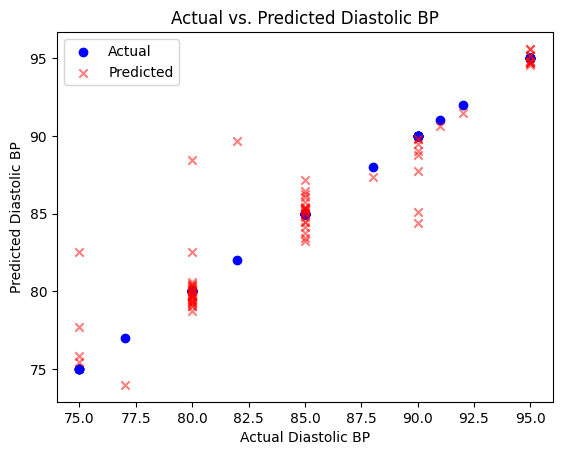

In [308]:
import matplotlib.pyplot as plt

plt.scatter(y_hr_test, y_hr_test, c='blue', label='Actual')
plt.scatter(y_hr_test, hr_predictions, c='red', label='Predicted',marker='x', alpha=0.5)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Actual vs. Predicted Heart Rate')
plt.legend()
plt.show()


# Create a scatter plot for Systolic BP
plt.scatter(y_sbp_test, y_sbp_test, c='blue', label='Actual')
plt.scatter(y_sbp_test, sbp_predictions, c='red', label='Predicted', marker='x', alpha=0.5)
plt.xlabel('Actual Systolic BP')
plt.ylabel('Predicted Systolic BP')
plt.title('Actual vs. Predicted Systolic BP')
plt.legend()
plt.show()

# Create a scatter plot for Diastolic BP
plt.scatter(y_dbp_test, y_dbp_test, c='blue', label='Actual')
plt.scatter(y_dbp_test, dbp_predictions, c='red', label='Predicted', marker='x', alpha=0.5)
plt.xlabel('Actual Diastolic BP')
plt.ylabel('Predicted Diastolic BP')
plt.title('Actual vs. Predicted Diastolic BP')
plt.legend()
plt.show()

In [309]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error for the Heart Rate model
hr_mse = mean_squared_error(y_hr_test, hr_predictions)
print('Heart Rate MSE:', hr_mse)

# Calculate the root mean squared error for the Heart Rate model
hr_rmse = mean_squared_error(y_hr_test, hr_predictions, squared=False)
print('Heart Rate RMSE:', hr_rmse)

# Calculate the R-squared score for the Heart Rate model
hr_r2 = r2_score(y_hr_test, hr_predictions)
print('Heart Rate R-squared:', hr_r2)

# Calculate the mean squared error for the Systolic BP model
sbp_mse = mean_squared_error(y_sbp_test, sbp_predictions)
print('Systolic BP MSE:', sbp_mse)

# Calculate the root mean squared error for the Systolic BP model
sbp_rmse = mean_squared_error(y_sbp_test, sbp_predictions, squared=False)
print('Systolic BP RMSE:', sbp_rmse)

# Calculate the R-squared score for the Systolic BP model
sbp_r2 = r2_score(y_sbp_test, sbp_predictions)
print('Systolic BP R-squared:', sbp_r2)

# Calculate the mean squared error for the Diastolic BP model
dbp_mse = mean_squared_error(y_dbp_test, dbp_predictions)
print('Diastolic BP MSE:', dbp_mse)

# Calculate the root mean squared error for the Diastolic BP model
dbp_rmse = mean_squared_error(y_dbp_test, dbp_predictions, squared=False)
print('Diastolic BP RMSE:', dbp_rmse)

# Calculate the R-squared score for the Diastolic BP model
dbp_r2 = r2_score(y_dbp_test, dbp_predictions)
print('Diastolic BP R-squared:', dbp_r2)

data = {
    "Heart Rate MSE": [hr_mse],
    "Heart Rate RMSE": [hr_rmse],
    "Heart Rate R-squared": [hr_r2],
    "Systolic BP MSE": [sbp_mse],
    "Systolic BP RMSE": [sbp_rmse],
    "Systolic BP R-squared": [sbp_r2],
    "Diastolic BP MSE": [dbp_mse],
    "Diastolic BP RMSE": [dbp_rmse],
    "Diastolic BP R-squared": [dbp_r2]
}

_data = { 'values': {"Heart Rate MSE": hr_mse, "Heart Rate RMSE": hr_rmse,"Heart Rate R-squared": hr_r2,"Systolic BP MSE": sbp_mse,"Systolic BP RMSE": sbp_rmse,"Systolic BP R-squared":sbp_r2,"Diastolic BP MSE":dbp_mse,"Diastolic BP RMSE":dbp_rmse,"Diastolic BP R-squared":dbp_r2} }
df_result = pd.DataFrame(_data)
df_result = df_result.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

Heart Rate MSE: 3.567798876339667
Heart Rate RMSE: 1.8888617938694368
Heart Rate R-squared: 0.8317865934704824
Systolic BP MSE: 6.747946739167612
Systolic BP RMSE: 2.5976810310674425
Systolic BP R-squared: 0.8737142577410026
Diastolic BP MSE: 4.046963578039665
Diastolic BP RMSE: 2.011706633194727
Diastolic BP R-squared: 0.8761470613358372


In [310]:
df_result

,values
Diastolic BP MSE,4.046964
Diastolic BP R-squared,0.876147
Diastolic BP RMSE,2.011707
Heart Rate MSE,3.567799
Heart Rate R-squared,0.831787
Heart Rate RMSE,1.888862
Systolic BP MSE,6.747947
Systolic BP R-squared,0.873714
Systolic BP RMSE,2.597681


In [ ]:
data = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/isat_690/project/Sleep_health_and_lifestyle_dataset.csv')

# Split the Blood Pressure column into two separate columns
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original Blood Pressure column
data = data.drop('Blood Pressure', axis=1)
data = data.drop('Person ID', axis=1)

# Create separate scatter plots for each pair of variables
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns[i+1:]):
        sns.scatterplot(data=data, x=col1, y=col2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title('{} vs. {}'.format(col1, col2))
        plt.show()

In [312]:
coefficients_hr = pd.DataFrame({'Variable': X.columns, 'Coefficient': hr_model.coef_})

# Sort the coefficients by their absolute value
coefficients_hr['abs'] = coefficients_hr['Coefficient'].abs()
coefficients_hr = coefficients_hr.sort_values('abs', ascending=False).drop('abs', axis=1)

# Display the coefficients
# print(coefficients)

                           Variable  Coefficient
22               BMI Category_Obese    10.895066
15  Occupation_Sales Representative    -8.375363
13               Occupation_Manager     4.889171
20              BMI Category_Normal    -4.132253
21       BMI Category_Normal Weight    -3.710664
23          BMI Category_Overweight    -3.052149
17             Occupation_Scientist     2.878607
18     Occupation_Software Engineer     2.221841
10                Occupation_Doctor    -2.190713
5                      Stress Level     1.750238
19               Occupation_Teacher    -1.391582
2                    Sleep Duration     1.316720
14                 Occupation_Nurse     1.179830
3                  Quality of Sleep    -0.778714
25       Sleep Disorder_Sleep Apnea     0.597359
24          Sleep Disorder_Insomnia    -0.480802
7                     Gender_Female     0.432968
8                       Gender_Male    -0.432968
11              Occupation_Engineer     0.398375
9             Occupa

In [316]:
coefficients_dbp = pd.DataFrame({'Variable': X.columns, 'Coefficient': dbp_model.coef_})

# Sort the coefficients by their absolute value
coefficients_dbp['abs'] = coefficients_dbp['Coefficient'].abs()
coefficients_dbp = coefficients_dbp.sort_values('abs', ascending=False).drop('abs', axis=1)

In [317]:
coefficients_hr

,Variable,Coefficient
14,Occupation_Nurse,6.044981
16,Occupation_Salesperson,-5.742436
13,Occupation_Manager,-5.665073
15,Occupation_Sales Representative,5.653450
9,Occupation_Accountant,-3.586835
23,BMI Category_Overweight,3.132367
21,BMI Category_Normal Weight,-3.059593
12,Occupation_Lawyer,2.778651
20,BMI Category_Normal,-2.214564
22,BMI Category_Obese,2.141790


In [318]:
coefficients_sbp = pd.DataFrame({'Variable': X.columns, 'Coefficient': sbp_model.coef_})

# Sort the coefficients by their absolute value
coefficients_sbp['abs'] = coefficients_sbp['Coefficient'].abs()
coefficients_sbp = coefficients_sbp.sort_values('abs', ascending=False).drop('abs', axis=1)

In [319]:
coefficients_sbp

,Variable,Coefficient
15,Occupation_Sales Representative,8.392165
16,Occupation_Salesperson,-7.521806
13,Occupation_Manager,-7.025924
14,Occupation_Nurse,6.961514
9,Occupation_Accountant,-5.348595
12,Occupation_Lawyer,4.017984
21,BMI Category_Normal Weight,-3.991088
22,BMI Category_Obese,3.513014
17,Occupation_Scientist,3.225728
7,Gender_Female,-2.330845
